# ニューラルネットワーク

## 活性化関数

In [1]:
function step_function(x)
    x>0 ? 1 : 0
end

function step_function(x)
    map(x -> x>0, x)
end

step_function (generic function with 1 method)

In [2]:
x = [-1 1 2]
x

1×3 Array{Int64,2}:
 -1  1  2

In [3]:
y = map(x -> x>0, x)

1×3 Array{Bool,2}:
 false  true  true

In [4]:
convert(Array{Int8, 2}, y)

1×3 Array{Int8,2}:
 0  1  1

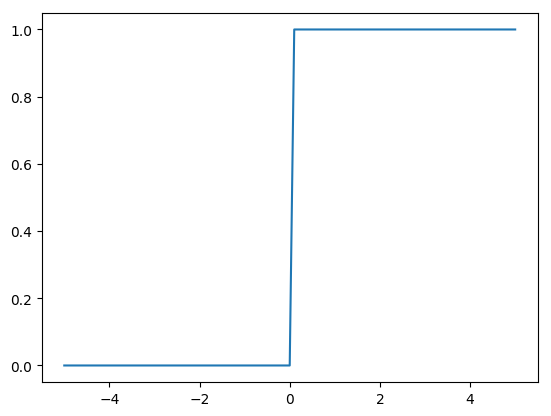

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1229bc940>

In [5]:
function step_function(x)
    map(x -> Int8(x>0), x)
end

x = -5:.1:5
y = step_function(x)
using PyPlot
plot(x, y)

In [6]:
function sigmoid(x)
    1 ./ (1 .+ exp.(-x))
end

sigmoid (generic function with 1 method)

In [7]:
x = [-1. 1. 2.]
sigmoid(x)

1×3 Array{Float64,2}:
 0.268941  0.731059  0.880797

In [8]:
t = [1 2 3]
println(1 .+ t)
println(1 ./ t)

[2 3 4]
[1.0 0.5 0.333333]


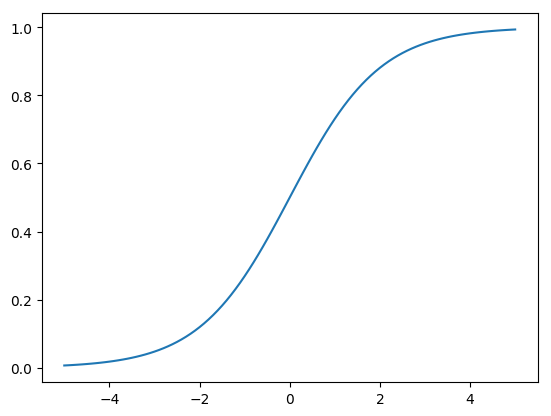

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1080fcb38>

In [9]:
x = -5:0.1:5
y = sigmoid(x)
plot(x, y)

In [10]:
function relu(x)
    max(0, x)
end

relu (generic function with 1 method)

## 多次元配列の計算

In [11]:
A = [1 2 3 4]
println(ndims(A))
println(size(A))

2
(1, 4)


In [12]:
B = [1 2; 3 4; 5 6]
println(B)
println(ndims(B))
println(size(B))

[1 2; 3 4; 5 6]
2
(3, 2)


In [13]:
A = [1 2; 3 4]
println(size(A))
B = [5 6; 7 8]
println(size(B))
A*B

(2, 2)
(2, 2)


2×2 Array{Int64,2}:
 19  22
 43  50

In [14]:
A = [1 2 3; 4 5 6]
println(size(A))
B = [1 2; 3 4; 5 6]
println(size(B))
A*B

(2, 3)
(3, 2)


2×2 Array{Int64,2}:
 22  28
 49  64

In [15]:
C = [1 2; 3 4]
println(size(C))
println(size(A))
A*C

(2, 2)
(2, 3)


LoadError: [91mDimensionMismatch("matrix A has dimensions (2,3), matrix B has dimensions (2,2)")[39m

In [16]:
A = [1 2; 3 4; 5 6]
println(size(A))
B = [7 8]'
println(size(B))
A*B

(3, 2)
(2, 1)


3×1 Array{Int64,2}:
 23
 53
 83

In [17]:
X = [1 2]
println(size(X))
W = [1 3 5; 2 4 6]
println(W)
println(size(W))
X*W

(1, 2)
[1 3 5; 2 4 6]
(2, 3)


1×3 Array{Int64,2}:
 5  11  17

## 3層ニューラルネットワークの実装

In [18]:
X = [1 .5]
W1 = [.1 .3 .5; .2 .4 .6]
B1 = [.1 .2 .3]
println(size(W1))
println(size(X))
println(size(B1))
A1 = X*W1 + B1

(2, 3)
(1, 2)
(1, 3)


1×3 Array{Float64,2}:
 0.3  0.7  1.1

In [19]:
Z1 = sigmoid(A1)
println(A1)
println(Z1)

[0.3 0.7 1.1]
[0.574443 0.668188 0.75026]


In [20]:
W2 = [.1 .4; .2 .5; .3 .6]
B2 = [.1 .2]
println(size(Z1))
println(size(W2))
println(size(B2))

(1, 3)
(3, 2)
(1, 2)


In [21]:
A2 = Z1 * W2 + B2
Z2 = sigmoid(A2)

1×2 Array{Float64,2}:
 0.626249  0.771011

In [22]:
function idenity_function(x)
    x
end

W3 = [.1 .3; .2 .4]
B3 = [.1 .2]

A3 = Z2*W3 + B3
Y = idenity_function(A3)

1×2 Array{Float64,2}:
 0.316827  0.696279

In [23]:
function init_network()
    network = Dict()
    network["W1"] = [.1 .3 .5; .2 .4 .6]
    network["b1"] = [.1 .2 .3]
    network["W2"] = [.1 .4; .2 .4; .3 .6]
    network["b2"] = [.1 .2]
    network["W3"] = [.1 .3; .2 .4]
    network["b3"] = [.1 .2]
    network
end

init_network (generic function with 1 method)

In [24]:
function forward(network, x)
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = x*W1 + b1
    z1 = sigmoid(a1)
    a2 = z1*W2 + b2
    z2 = sigmoid(a2)
    a3 = z2*W3 + b3
    y = idenity_function(a3)
    y
end

forward (generic function with 1 method)

In [25]:
network = init_network()
x = [1. .5]
y = forward(network, x)
println(y)

[0.314425 0.691475]


## 出力層の設計

In [26]:
a = [.3 2.9 4.]
exp_a = exp.(a)
println(exp_a)
sum_exp_a = sum(exp_a)
println(sum_exp_a)
y = exp_a / sum_exp_a

[1.34986 18.1741 54.5982]
74.1221542101633


1×3 Array{Float64,2}:
 0.0182113  0.245192  0.736597

In [27]:
function softmax(a)
    exp_a = exp.(a)
    sum_exp_a = sum(exp_a)
    y = exp_a / sum_exp_a
    y
end

softmax (generic function with 1 method)

In [28]:
a = [1010 1000 990]
println(exp.(a) / sum(exp.(a)))
c = maximum(a)
println(a - c)
exp.(a-c) / sum(exp.(a-c))

[NaN NaN NaN]
[0 -10 -20]


1×3 Array{Float64,2}:
 0.999955  4.53979e-5  2.06106e-9

In [29]:
function softmax(a)
    c = maximum(a)
    exp_a = exp.(a - c)
    sum_exp_a = sum(exp_a)
    y = exp_a / sum_exp_a
    y
end

softmax (generic function with 1 method)

In [30]:
a = [.3 2.9 4.]
y = softmax(a)
println(y)
sum(y)

[0.0182113 0.245192 0.736597]


1.0

## 手書き数字認識

In [31]:
using MLDatasets
x_train, y_train = MNIST.traindata()
x_test, y_test = MNIST.testdata()

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [32]:
println(size(x_train))
println(size(y_train))
println(size(x_test))
println(size(y_test))

(28, 28, 60000)
(60000,)
(28, 28, 10000)
(10000,)


In [33]:
y_train[1]

5

In [35]:
using ImageView
img = x_train[:,:,1]
#imshow(img)

28×28 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0        0.0  0.0  0.0
 

In [36]:
using PyCall
@pyimport pickle

function get_data()
    x_test, t_test = MNIST.testdata()
    return x_test, t_test
end

function init_network()
    fo = open("sample_weight.pkl", "r")
    network = pickle.loads(pybytes(read(fo)))
    network
end

function predict(network, x)
    W1, W2, W3 = network["W1"], network["W2"],  network["W3"]
    b1, b2, b3 = network["b1"], network["b2"],  network["b3"]
    a1 = W1'*x + b1
    z1 = sigmoid(a1)
    a2 = W2'*z1 + b2
    z2 = sigmoid(a2)
    a3 = W3'*z2 + b3
    y = softmax(a3)
    y    
end

predict (generic function with 1 method)

In [37]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in 1:size(x)[3]
    y = predict(network, reshape(x[:,:,i], 784, 1))
    p = indmax(y)
    if p == (t[i]+1)
        accuracy_cnt += 1
    end
end
println("Accuracy:", float(accuracy_cnt)/size(x)[3] )

Accuracy:0.9352


### batch処理比較

In [38]:
function predict(network, x)
    W1, W2, W3 = network["W1"], network["W2"],  network["W3"]
    b1, b2, b3 = network["b1"], network["b2"],  network["b3"]
    a1 = W1'*x .+ b1
    z1 = sigmoid(a1)
    a2 = W2'*z1 .+ b2
    z2 = sigmoid(a2)
    a3 = W3'*z2 .+ b3
    y = softmax(a3)
    y    
end

predict (generic function with 1 method)

In [39]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in 1:batch_size:size(x)[3]
    x_batch = reshape(x[:, :, i:i+batch_size-1], 784, batch_size)
    y_batch = predict(network, x_batch)

    tmp = findmax(y_batch, 1)[2]
    p = [tmp[j] - (j-1)*10 for j in 1:length(tmp)]
    accuracy_cnt += sum(t[i:i+batch_size-1] .== p-1)
end
println("Accuracy:", float(accuracy_cnt)/size(x)[3] )

Accuracy:0.9352


In [40]:
function not_batch()
    accuracy_cnt = 0
    for i in 1:size(x)[3]
        y = predict(network, reshape(x[:,:,i], 784, 1))
        p = indmax(y)
        if p == (t[i]+1)
            accuracy_cnt += 1
        end
    end
end

function batch()
    batch_size = 100
    accuracy_cnt = 0
    
    for i in 1:batch_size:size(x)[3]
        x_batch = reshape(x[:, :, i:i+batch_size-1], 784, batch_size)
        y_batch = predict(network, x_batch)
    
        tmp = findmax(y_batch, 1)[2]
        p = [tmp[j] - (j-1)*10 for j in 1:length(tmp)]
        accuracy_cnt += sum(t[i:i+batch_size-1] .== p-1)
    end
end

batch (generic function with 1 method)

In [41]:
@time not_batch()
@time batch()

  2.189818 seconds (2.71 M allocations: 233.079 MiB, 1.55% gc time)
  1.202376 seconds (88.93 k allocations: 114.248 MiB, 1.94% gc time)


juliaでもバッチ化の効果有り